# Projet: Reconnaissance de Chiffre  
Les fichiers de données contiennent des images en niveaux de gris de chiffres dessinés à la main, de zéro à neuf.  
Chaque image mesure 28 pixels de hauteur et 28 pixels de largeur, pour un total de 784 pixels au total. Chaque pixel a une seule valeur de pixel qui lui est associée, indiquant la clarté ou l'obscurité de ce pixel, avec des nombres plus élevés signifiant plus sombre. Cette valeur de pixel est un entier compris entre 0 et 255 inclus.  
  
L'objectif principale de ce projet est de :  
* construire au moins deux modèles au moins un modèle ensembliste  
* Trouver les meilleurs paramètres à l'aide de cross-validation.  
* Appliquée le meilleur modèle à l'ensemble de test pour valider le modèle.  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import files
files.upload()

Saving sample_submission.csv to sample_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


## Exploration et visualisation des données

In [65]:
# load data
train = pd.read_csv('/content/train (1).csv',sep=',',header=0, encoding= 'unicode_escape')
test = pd.read_csv('/content/test.csv',sep=',',header=0, encoding= 'unicode_escape')
#sample_submission = pd.read_csv('/content/sample_submission.csv') 


In [66]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***Visualisation des chiffres***

8


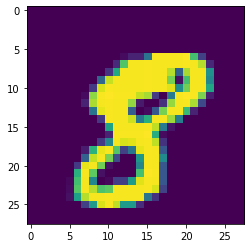

In [69]:
def show_example(X, y, row):
    print(y[row])
    plt.imshow(X[row].reshape((28, 28)))
    plt.show()


show_example(train.values[:400, 1:], train.values[:400, 0], 10)

In [68]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


 L'ensemble de données contient 3022 images de traning et 28000 images de test.  
   
L'ensemble de données d'entraînement (train.csv) comporte 785 colonnes. La première colonne, appelée «étiquette», est le chiffre qui a été dessiné par l'utilisateur. Le reste des colonnes contient les valeurs de pixel de l'image associée.  
  
L'ensemble de données de test (test.csv) est le même que l'ensemble d'apprentissage, sauf qu'il ne contient pas la colonne «label».  
  
  
On va redimensioné notre jeu de donné en 28x28 pour 28 pixels de hauteur et 28 pixels de largeur. Et diviser tous les pixels par 255 (faire une normalisation)

In [70]:

train_image = np.array(train.drop('label', axis=1))/255.0
train_image = train_image.reshape(-1, 28, 28, 1)
train_label = np.array(train['label'])

print("train_image Shape :" + str(train_image.shape))
print("trainlebel shape :" + str(train_label.shape))

train_image Shape :(42000, 28, 28, 1)
trainlebel shape :(42000,)


label: 7


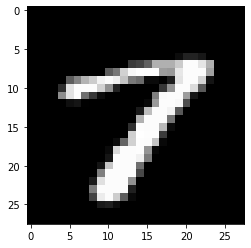

In [71]:
plt.imshow(train_image[3000].squeeze(), cmap=plt.get_cmap('gray'))
print('label:',train_label[3000].item())
plt.show()

On va essayer d'afficher quelques images avec leurs lables

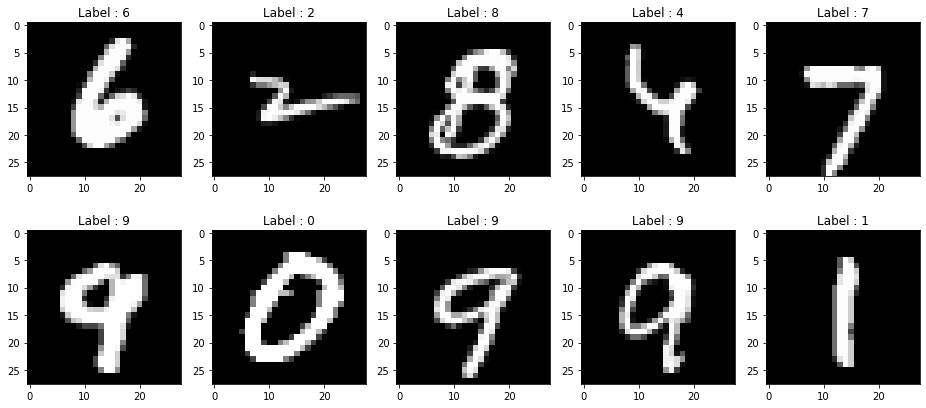

In [72]:

fig,plot = plt.subplots(2, 5, figsize=(16,7))
for k in range(10):
    l = np.random.randint(low=0, high=train_image.shape[0])
    axes = plot[k//5, k%5]
    axes.imshow(train_image[l].reshape(28,28), cmap=plt.get_cmap('gray'))
    axes.set_title("Label : " + str(train_label[l]))
plt.show()